In [49]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from my_module import * 
import warnings
from wordcloud import WordCloud
warnings.filterwarnings("ignore")

In [50]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
movies_df=pd.read_csv('movies_cleaned_str_int.csv')

In [53]:
movies_df.columns,
movies_df.drop(['Unnamed: 0'], axis=1)

,awards.nominations,awards.wins,cast,countries,directors,fullplot,genres,imdb.rating,imdb.votes,languages,...,plot,rated,runtime,title,tomatoes.consensus,tomatoes.fresh,tomatoes.production,tomatoes.rotten,writers,year
0,0,1,jane gail ethel grandin william h turner ...,usa,george loane tucker,not rated,crime,6.0,371.0,english,...,"A woman, with the aid of her police officer sw...",pg,88.0,traffic in souls,0,0.0,0,0.0,unknow,1913
1,0,1,stanley hunt sarah constance smith hunt mr...,usa,edward s curtis,not rated,drama,5.8,223.0,english,...,Original advertising for the film describes it...,not rated,65.0,in the land of the head hunters,0,0.0,0,0.0,edward s curtis story,1914
2,0,2,lillian gish mae marsh henry b walthall ...,usa,d w griffith,two brothers phil and ted stoneman visit the...,drama,6.8,15715.0,not,...,The Civil War divides friends and destroys fam...,not rated,165.0,the birth of a nation,1,38.0,1,0.0,thomas dixon jr adapted from his novel th...,1915
3,0,1,fannie ward sessue hayakawa jack dean ja...,usa,cecil b demille,edith hardy uses charity funds for wall street...,drama,6.5,1660.0,english,...,"A venal, spoiled stockbroker's wife impulsivel...",not rated,59.0,the cheat,0,0.0,0,0.0,hector turnbull scenario jeanie macpherson...,1915
4,0,1,george beban clara williams j frank burke...,usa,reginald barker,an immigrant leaves his sweetheart in italy to...,drama,6.4,175.0,english,...,An immigrant leaves his sweetheart in Italy to...,pg,78.0,the italian,0,0.0,0,0.0,thomas h ince story c gardner sullivan ...,1915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22459,2,0,hsiao chuan chang qian wan tang sui yann...,taiwan,chung lee,a gu enlists a group of contract killers in th...,comedy,6.3,27.0,mandarin,...,A-Gu enlists a group of contract killers in th...,not rated,110.0,the laundryman,0,0.0,0,0.0,unknow,2015
22460,1,0,filip plawiak adam woronowicz julia kijows...,poland,marcin koszalka,karol an ordinary young man runs into a much...,thriller,7.4,16.0,polish,...,"Karol, an ordinary young man, runs into a much...",not rated,90.0,the red spider,0,0.0,0,0.0,marcin koszalka lukasz m maciejewski mart...,2015
22461,1,0,maxim gaudette karelle tremblay valerie ca...,canada,anne èmond,guy s tragic death is a shock for the leblanc ...,drama,7.4,5.0,french,...,Guy's tragic death is a shock for the Leblanc ...,not rated,102.0,our loved ones,0,0.0,0,0.0,anne èmond,2015
22462,1,0,chantal akerman,belgium,chantal akerman,not rated,documentary,3.8,5.0,french,...,NaN,not rated,115.0,no home movie,0,0.0,0,0.0,chantal akerman,2015


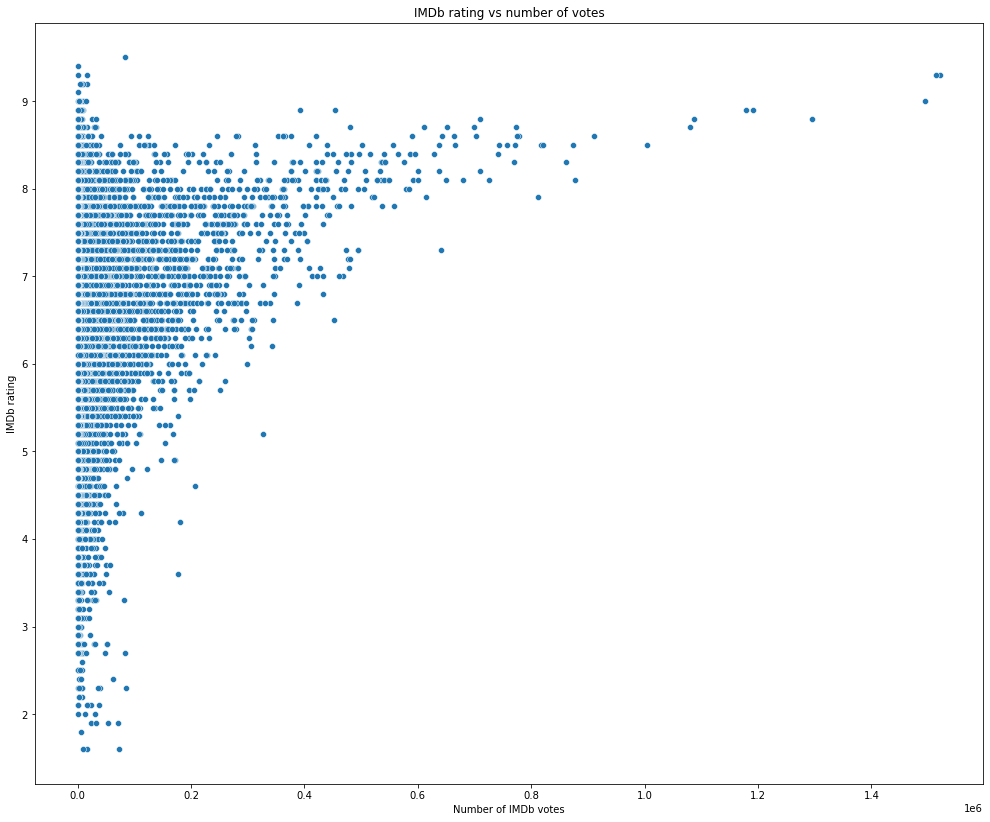

In [54]:
plt.figure(figsize=(17,14))

sns.scatterplot(x='imdb.votes', y='imdb.rating', data=movies_df)
plt.xlabel("Number of IMDb votes")
plt.ylabel("IMDb rating")
plt.title("IMDb rating vs number of votes")
plt.show()


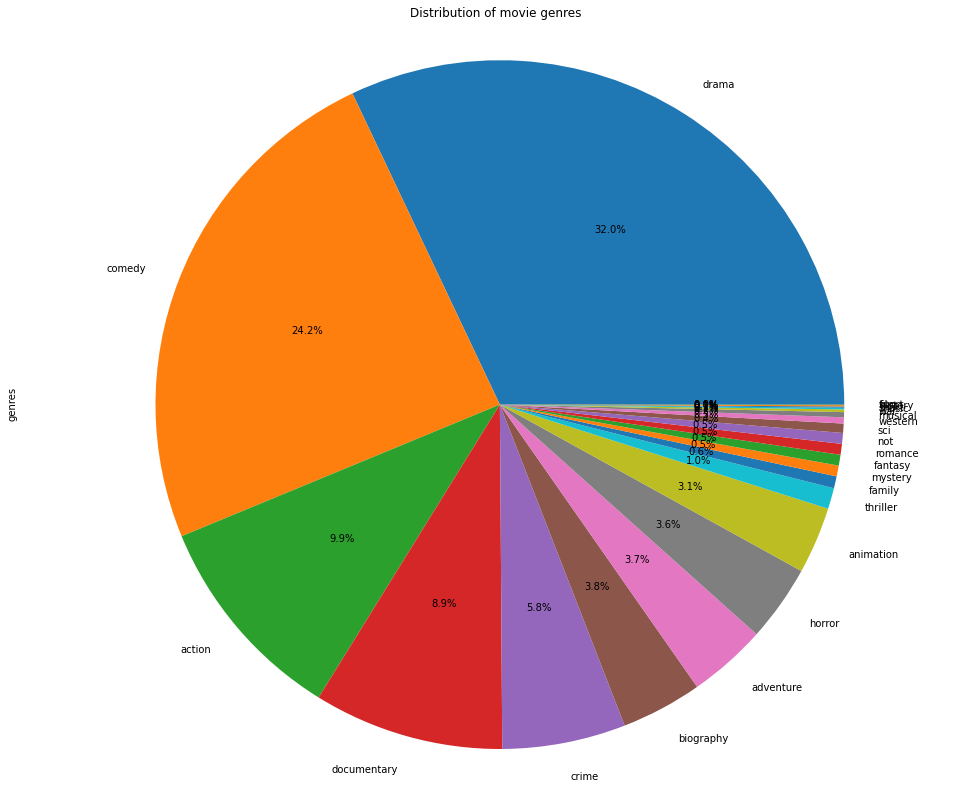

In [55]:
plt.figure(figsize=(17,14))

genres_count = movies_df['genres'].value_counts()
genres_count.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title("Distribution of movie genres")
plt.show()


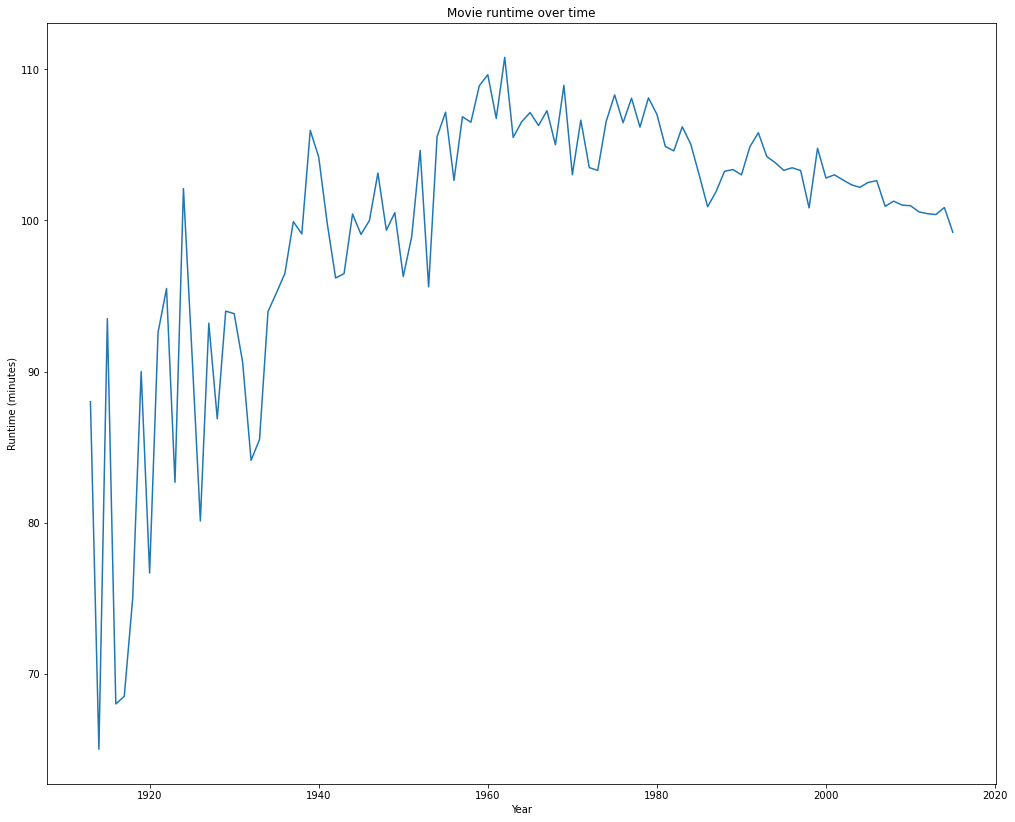

In [56]:
plt.figure(figsize=(17,14))

movies_df.groupby(['year'])['runtime'].mean().plot()
plt.xlabel("Year")
plt.ylabel("Runtime (minutes)")
plt.title("Movie runtime over time")
plt.show()


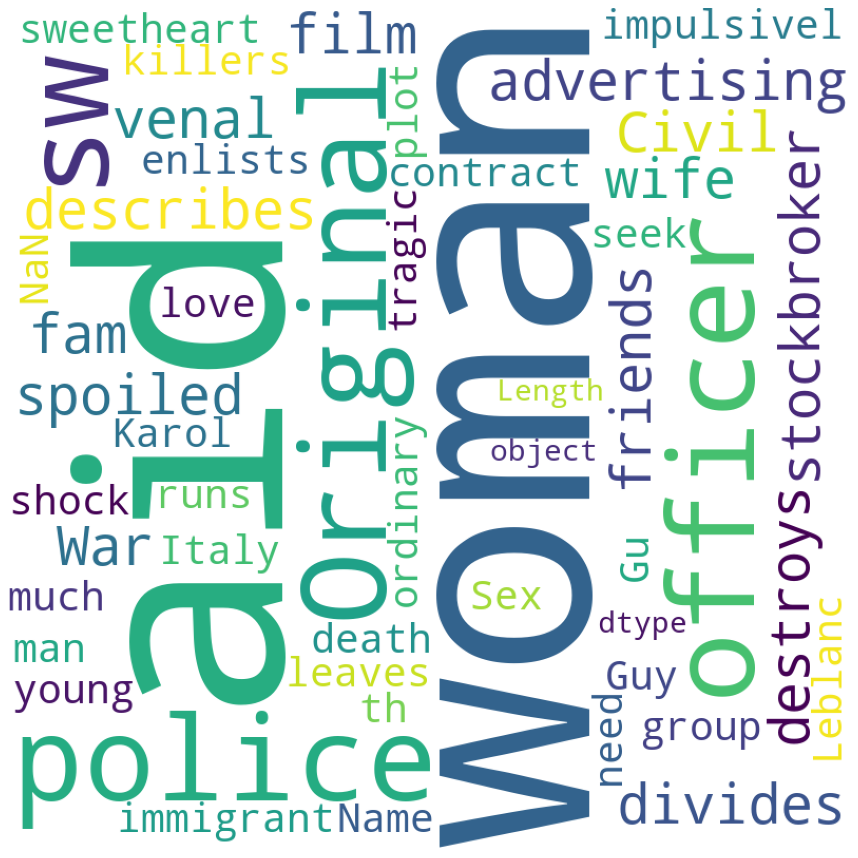

In [57]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(str(movies_df['plot']))
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 1)
plt.show()


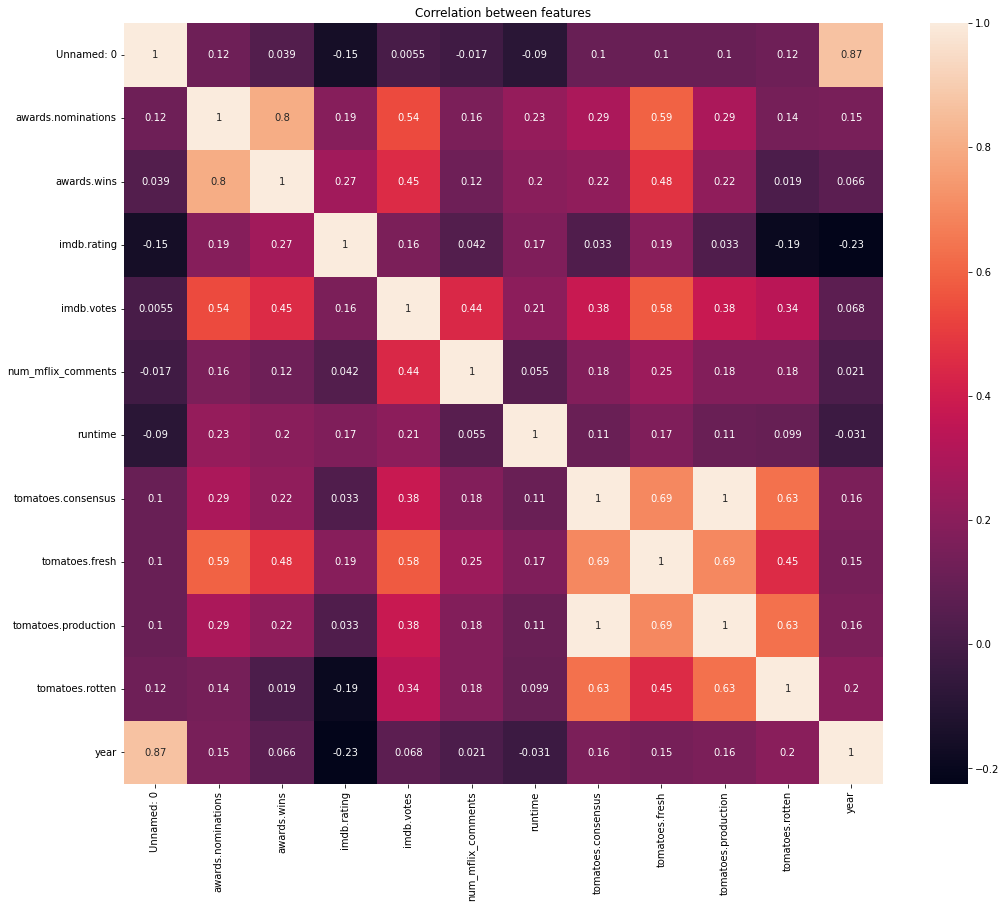

In [58]:
plt.figure(figsize=(17,14))

corr = movies_df.corr()
sns.heatmap(corr, annot = True)
plt.title("Correlation between features")
plt.show()

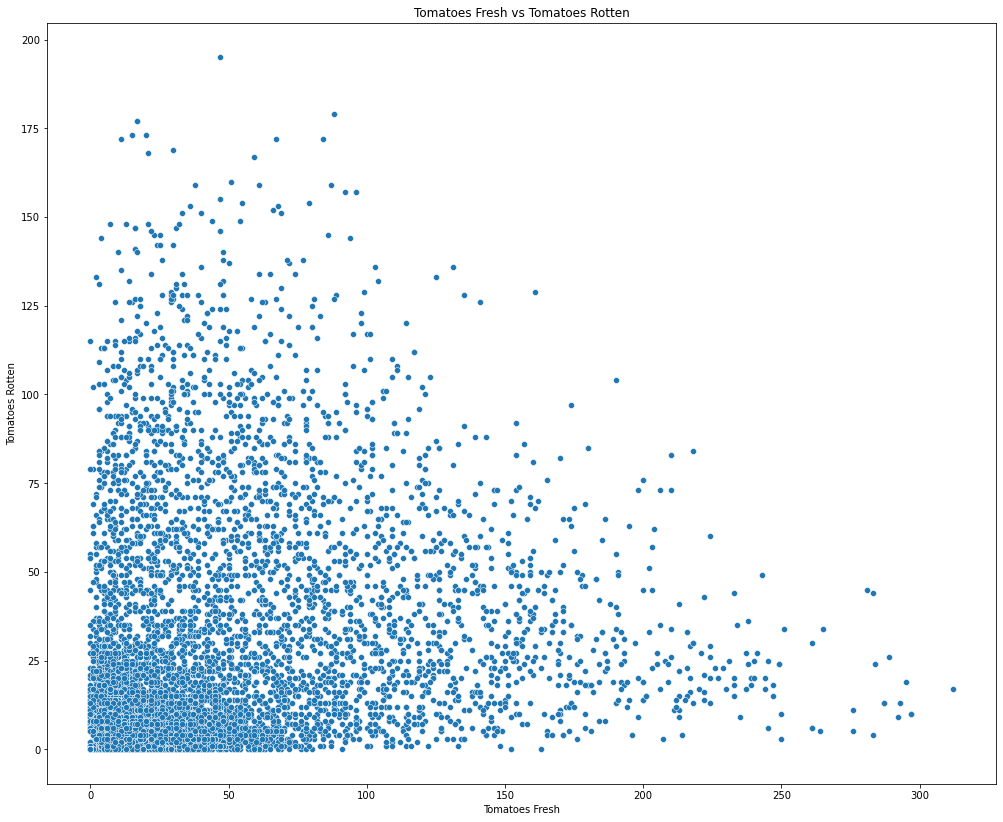

In [59]:
plt.figure(figsize=(17,14))

sns.scatterplot(x='tomatoes.fresh', y='tomatoes.rotten', data=movies_df)
plt.xlabel("Tomatoes Fresh")
plt.ylabel("Tomatoes Rotten")
plt.title("Tomatoes Fresh vs Tomatoes Rotten")
plt.show()

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

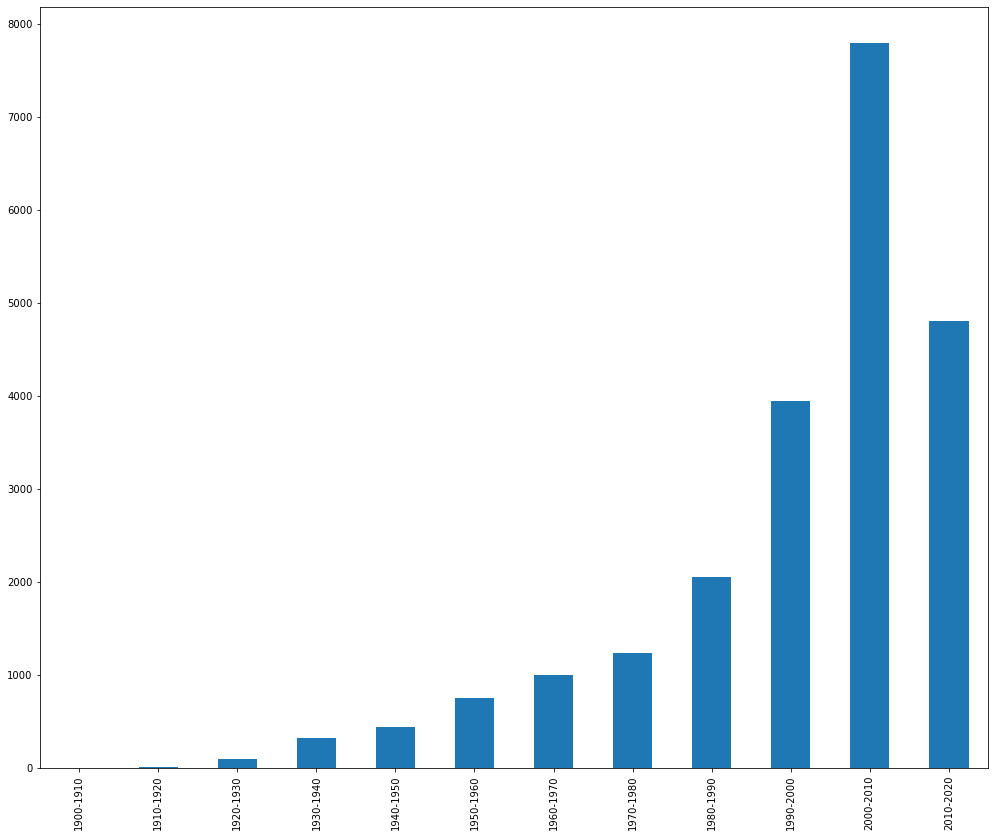

In [60]:
plt.figure(figsize=(17,14))

# create bins for 10 year intervals
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ["1900-1910", "1910-1920", "1920-1930", "1930-1940", "1940-1950", "1950-1960", "1960-1970", "1970-1980", "1980-1990", "1990-2000", "2000-2010", "2010-2020"]

# group years into 10 year intervals
movies_df['year_group'] = pd.cut(movies_df['year'], bins, labels=labels)

# create bar chart
year_group_count = movies_df['year_group'].value_counts()
year_group_count.sort_index().plot(kind='bar')
plt.xlabel

<AxesSubplot:xlabel='rated', ylabel='count'>

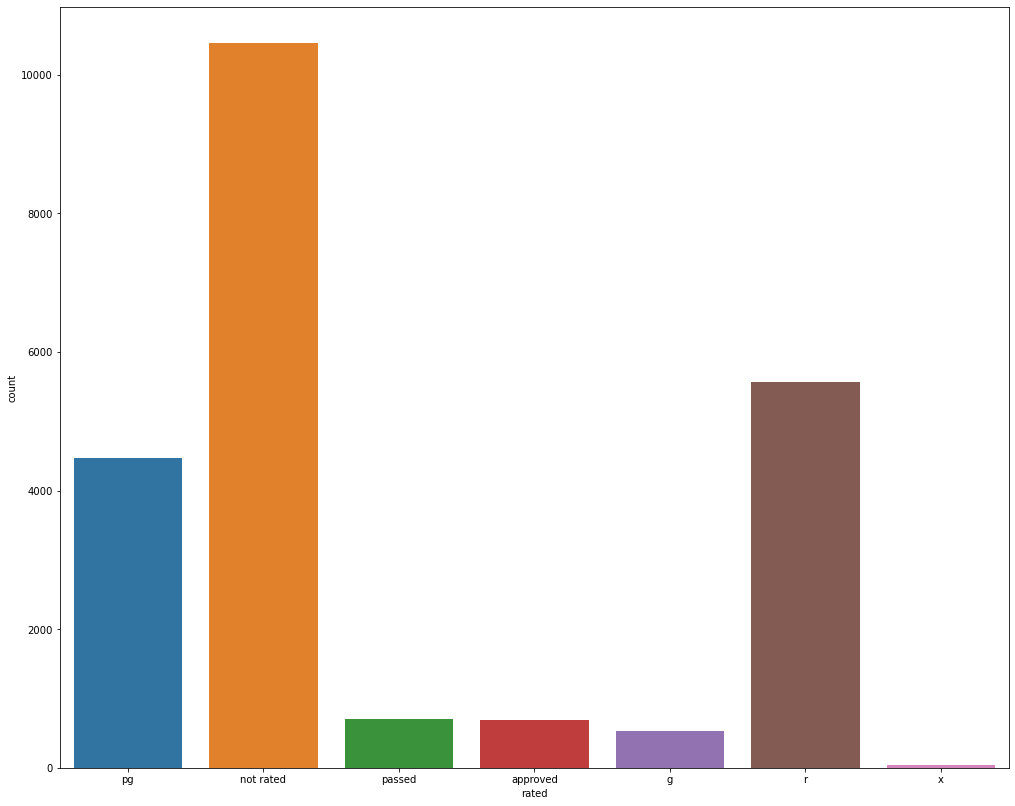

In [61]:
plt.figure(figsize=(17,14))

sns.countplot(x='rated', data=movies_df)


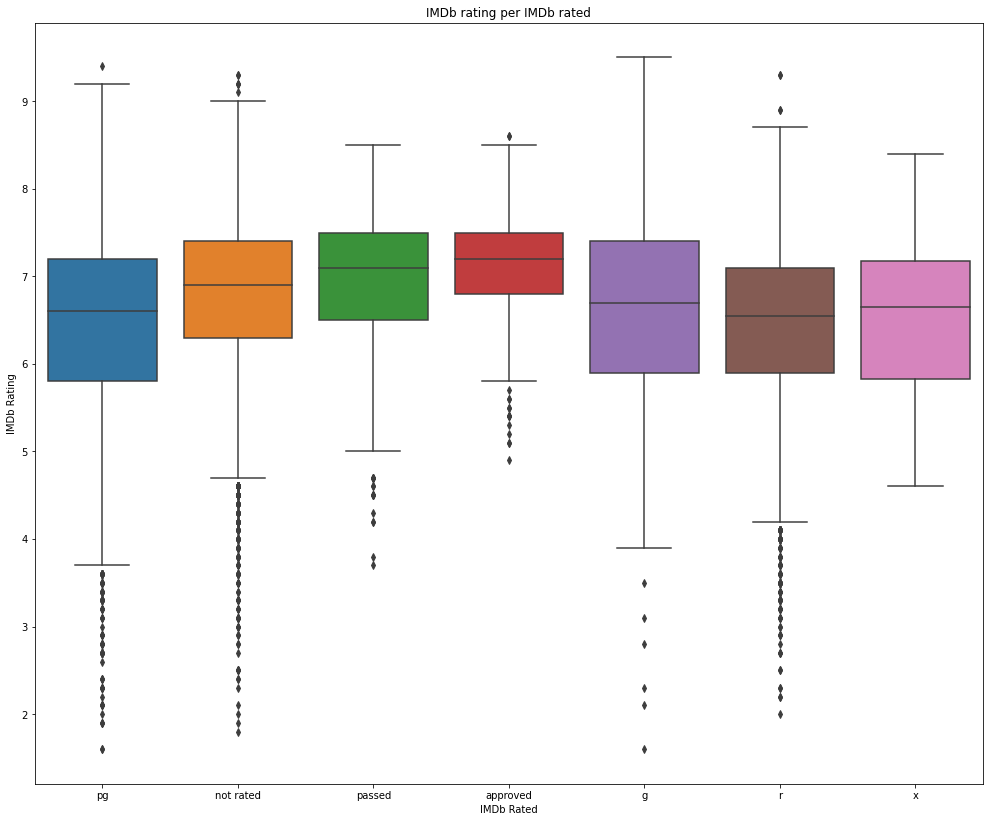

In [62]:
plt.figure(figsize=(17,14))

# create a boxplot
sns.boxplot(x='rated', y='imdb.rating', data=movies_df)
plt.title("IMDb rating per IMDb rated")
plt.xlabel("IMDb Rated")
plt.ylabel("IMDb Rating")
plt.show()


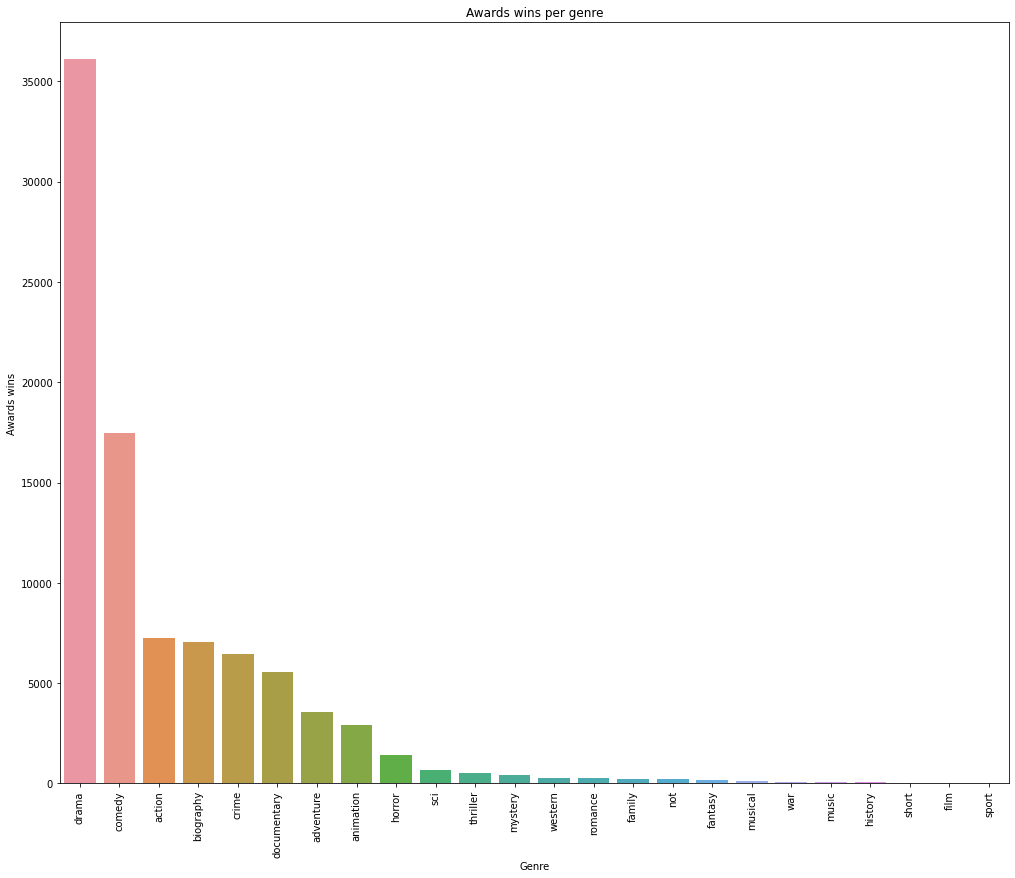

In [63]:
plt.figure(figsize=(17,14))

# group by genre and sum the awards wins
genres_wins = movies_df.groupby('genres')['awards.wins'].sum().sort_values(ascending=False)

# create a bar chart
sns.barplot(x = genres_wins.index, y = genres_wins.values)
plt.title("Awards wins per genre")
plt.xlabel("Genre")
plt.ylabel("Awards wins")
plt.xticks(rotation=90)
plt.show()
